## **Walmart Sales Forecast**

In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [16]:
train = pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\project_w\train.csv")
test = pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\project_w\test.csv")
stores = pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\project_w\stores.csv")
features = pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\project_w\features.csv")

### **Data Processing & Cleaning**

In [17]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [18]:
df = train.merge(features, on=["Store","Date"], how="left")
df = df.merge(stores, on="Store", how="left")

print(df.shape)
df.head()

(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [19]:
print(df.shape)

(421570, 17)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [21]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday_x        bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_y        bool
Type             object
Size              int64
dtype: object

In [22]:
print(df.shape)

(421570, 17)


In [23]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [24]:
missing = df.isnull().sum()

In [25]:
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing>0])


MarkDown2    310322
MarkDown4    286603
MarkDown3    284479
MarkDown1    270889
MarkDown5    270138
dtype: int64


In [26]:
df.fillna(0, inplace=True)

In [27]:
df["Date"] = pd.to_datetime(df["Date"])

df["year"] = df["Date"].dt.year
df["week"] = df["Date"].dt.isocalendar().week
df["day"] = df["Date"].dt.day

### **⭐EDA (Exploratory Data Analysis)**

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
sns.set_style("whitegrid")
sns.set_palette("Set2")
plt.rcParams["font.size"] = 12

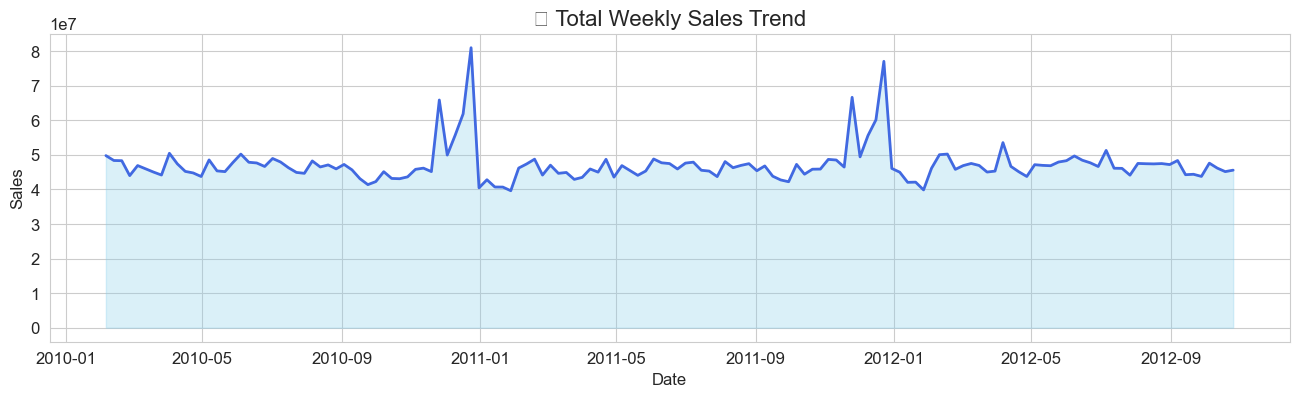

In [31]:
weekly_sales = df.groupby("Date")["Weekly_Sales"].sum()

plt.figure(figsize=(16, 4))
plt.plot(weekly_sales, color="royalblue", linewidth=2)
plt.fill_between(weekly_sales.index, weekly_sales, color="skyblue", alpha=0.3)

plt.title("📈 Total Weekly Sales Trend", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

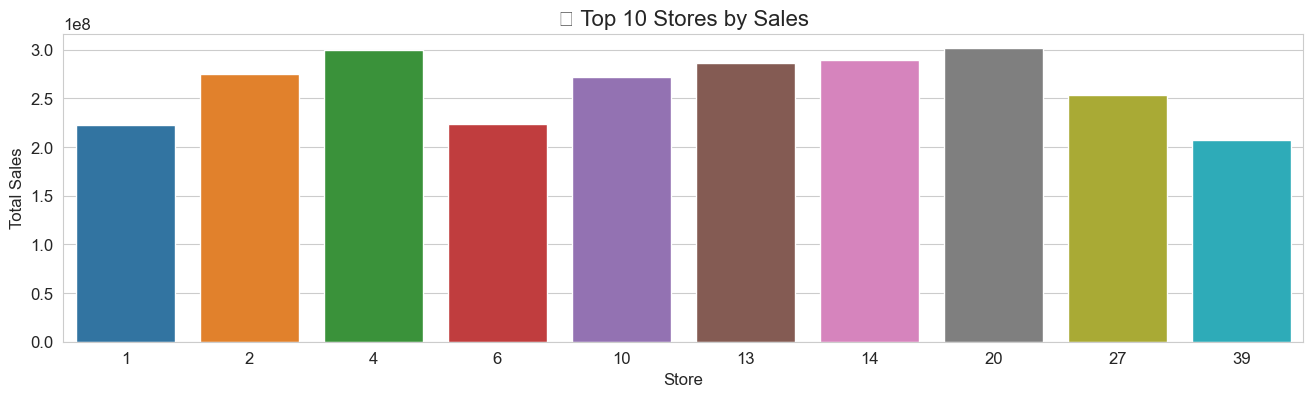

In [32]:
store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(16, 4))
sns.barplot(x=store_sales.index, y=store_sales.values, palette="tab10")
plt.title("🏬 Top 10 Stores by Sales", fontsize=16)
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()

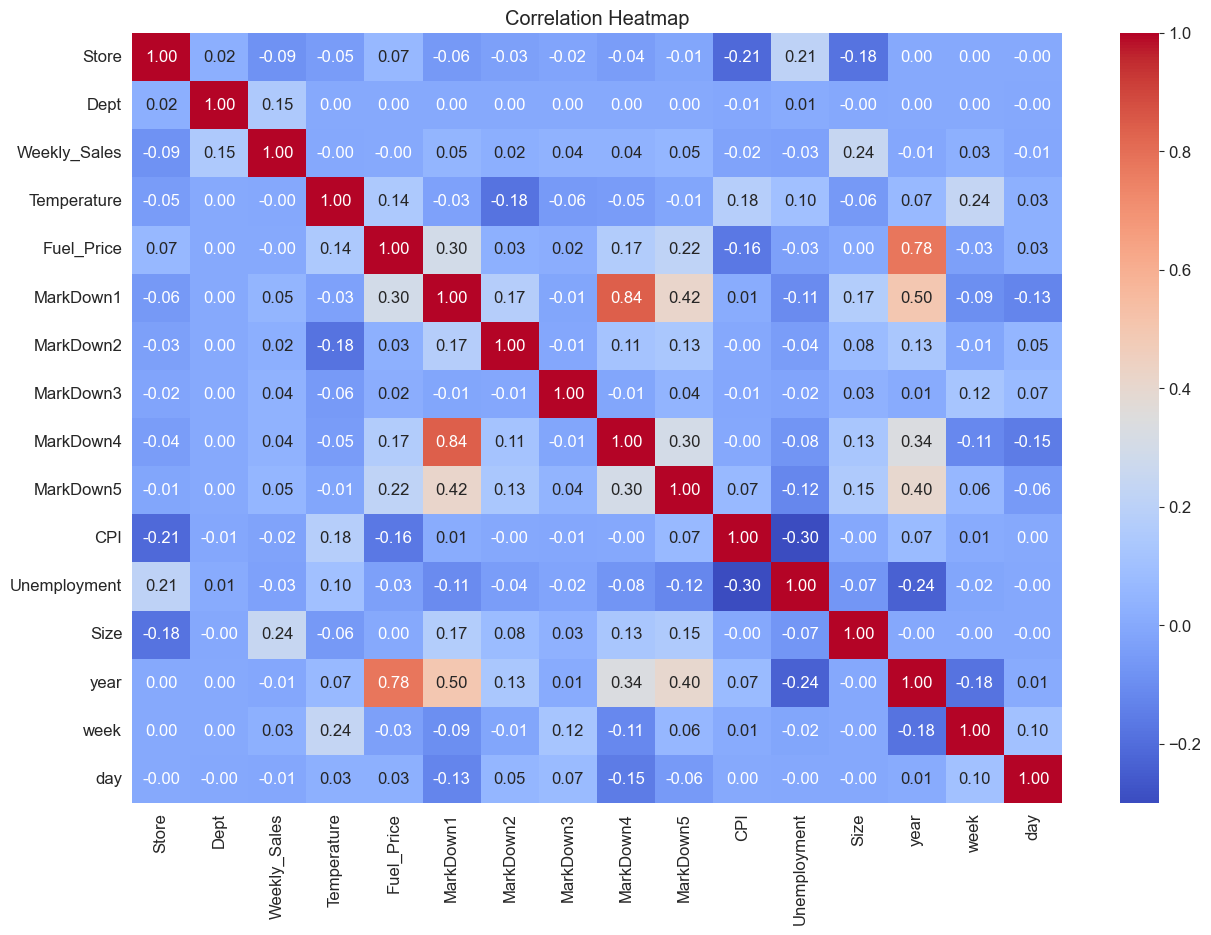

In [33]:
num_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(15,10))
sns.heatmap(num_df.corr(),
            annot=True,        
            
            fmt=".2f",         
            cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()

In [38]:
df["IsHoliday"] = df["IsHoliday_x"]

df.drop(["IsHoliday_x","IsHoliday_y"], axis=1, inplace=True)
df["IsHoliday"] = df["IsHoliday"].astype(int)

IsHoliday
0    15901.445069
1    17035.823187
Name: Weekly_Sales, dtype: float64


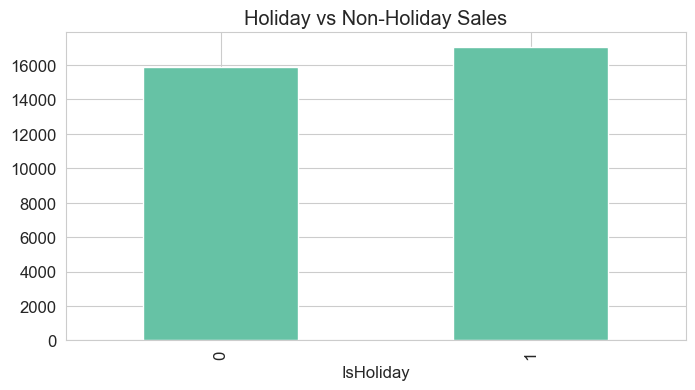

In [39]:
holiday_sales = df.groupby("IsHoliday")["Weekly_Sales"].mean()
print(holiday_sales)
plt.figure(figsize=(8, 4))
holiday_sales.plot(kind="bar")
plt.title("Holiday vs Non-Holiday Sales")
plt.show()

### **Feature Engineering**

In [40]:
df = pd.get_dummies(df, columns=["Type"], drop_first=True)

In [41]:
df = df.sort_values(["Store","Dept","Date"])

In [42]:
df["lag_1"] = df.groupby(["Store","Dept"])["Weekly_Sales"].shift(1)
df["lag_2"] = df.groupby(["Store","Dept"])["Weekly_Sales"].shift(2)

In [43]:
df["rolling_mean_4"] = df.groupby(["Store","Dept"])["Weekly_Sales"].transform(lambda x: x.rolling(4).mean())
df["rolling_mean_12"] = df.groupby(["Store","Dept"])["Weekly_Sales"].transform(lambda x: x.rolling(12).mean())

In [44]:
df.dropna(inplace=True)

In [45]:
df["week"] = df["week"].astype(int)

In [46]:
df[["Type_B","Type_C"]] = df[["Type_B","Type_C"]].astype(int)

In [47]:
df.info()
df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 386102 entries, 11 to 421569
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            386102 non-null  int64         
 1   Dept             386102 non-null  int64         
 2   Date             386102 non-null  datetime64[ns]
 3   Weekly_Sales     386102 non-null  float64       
 4   Temperature      386102 non-null  float64       
 5   Fuel_Price       386102 non-null  float64       
 6   MarkDown1        386102 non-null  float64       
 7   MarkDown2        386102 non-null  float64       
 8   MarkDown3        386102 non-null  float64       
 9   MarkDown4        386102 non-null  float64       
 10  MarkDown5        386102 non-null  float64       
 11  CPI              386102 non-null  float64       
 12  Unemployment     386102 non-null  float64       
 13  Size             386102 non-null  int64         
 14  year             386102 

0

### **Model**

In [48]:
df = df.sort_values("Date")

split_date = "2012-01-01"   # or 80%

train = df[df["Date"] < split_date]
test  = df[df["Date"] >= split_date]

print(train.shape, test.shape)

(259132, 24) (126970, 24)


In [49]:
X_train = train.drop(["Weekly_Sales","Date"], axis=1)
y_train = train["Weekly_Sales"]

X_test = test.drop(["Weekly_Sales","Date"], axis=1)
y_test = test["Weekly_Sales"]

In [50]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

MAE : 1024.4161692146574
RMSE: 2240.338975432487
R2  : 0.9897613160320284


In [52]:
train_pred = model.predict(X_train)

from sklearn.metrics import r2_score

print("Train R2:", r2_score(y_train, train_pred))
print("Test  R2:", r2_score(y_test, y_pred))

Train R2: 0.9963191453902456
Test  R2: 0.9897613160320284
